# E-76 Obligated Federal Funds Data Exploration
### From the Division of Local Assistance 

E-76's or "Authorizations to Proceed" is a federal authorization of funds to establish the reimbursement date for a phase of work 

#### Data Sources: 
- [Obligated](https://dot.ca.gov/programs/local-assistance/reports/e-76-obligated)
- [Waiting](https://dot.ca.gov/programs/local-assistance/reports/e-76-waiting)

In this notebook, we will be looking to see what types of data is in the spreadsheet as well as begin to clean it for futher analysis


In [1]:
##one time load 
!pip install openpyxl

  Using cached openpyxl-3.0.9-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [2]:
import pandas as pd
from siuba import _, mutate, count, filter, group_by, ungroup
import numpy as np

## Reading Excel as a data dictionary
Can use this approach, but recommend the next with second one. 

In [3]:
#obligated = pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=['2014-2018', '2019', '2020', '2021'])


In [4]:
#print(obligated)

In [5]:
#print(type(obligated))

In [6]:
#len(obligated)

In [7]:
#print(type(obligated['2020']))

In [8]:
#obligated['2020'].info()

In [9]:
#obligated['2021'].info()

In [10]:
#obligated['2019'].info()

In [11]:
#obligated['2014-2018'].info()

In [12]:
#df1 = obligated['2014-2018']
#df2 = obligated['2019']
#df3 = obligated['2020']
#df4 = obligated['2021']

In [13]:
#pd_dct = {"pre2018": df1, "2019": df2, "2020":df3, "2021":df4}

In [14]:
#mdf = pd.concat(pd_dct, axis=0).reset_index(level=0).rename({'level_0':'key'}, axis=1)

In [15]:
#mdf

## Reading Excel with Concat

In [3]:
#attempt 2
## code source: https://pbpython.com/pandas-excel-tabs.html
df = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/obligated-projects.xlsx', sheet_name=None), ignore_index=True)


/opt/conda/lib/python3.9/site-packages/google/auth/_default.py:68: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. We recommend you rerun `gcloud auth application-default login` and make sure a quota project is added. Or you can use service accounts instead. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [4]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,...,9.0,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,...,7.0,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,...,6.0,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,...,0.0,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,...,0.0,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [5]:
df.tail()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
20016,Obligated,BRLO,5955(095),Orange County,2021-08-20 00:00:00,2021-08-27 00:00:00,2021-08-31 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,82000.0,...,16.0,ORA020501,"Silverado Canyon Road Over Silverado Creek, Ap...",Bridge Replacement (tc).,2,2021-08-20 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20017,Obligated,HSIPL,5073(093),Orange,2021-08-17 00:00:00,2021-08-27 00:00:00,2021-08-30 00:00:00,2021-08-30 00:00:00,2021-09-08 00:00:00,21000.0,...,9.0,SCAG015,Intersection Of Glassell St. & Palmyra Ave.,Install A New 2-phase Traffic Signal,2,2021-07-28 00:00:00,2021-08-26 00:00:00,SCAG,NaT,NaN
20018,Obligated,HSIPL,5073(078),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Glassell Street And Walnut Avenue,Protected Left-turn Signal Phasing,4,2021-08-13 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20019,Obligated,HSIPL,5073(080),Orange,2021-08-18 00:00:00,2021-08-27 00:00:00,2021-09-01 00:00:00,2021-09-01 00:00:00,2021-09-17 00:00:00,0.0,...,16.0,SCAG015,Intersection Of Chapman Avenue And James Street,Install Protected Left Turn Signal Phasing,4,2021-08-12 00:00:00,2021-08-27 00:00:00,SCAG,NaT,NaN
20020,Obligated,CMSTPLN,6071(129),Orange County Transportation Authority,2021-08-23 00:00:00,2021-08-24 00:00:00,2021-08-31 00:00:00,2021-08-31 00:00:00,2021-09-09 00:00:00,8000000.0,...,9.0,ORA100511,State Route 55 From Interstate 405 To Intersta...,Add One Mixed-flow And High-occupancy Lane In ...,6,2021-06-01 00:00:00,2021-08-22 00:00:00,SCAG,NaT,NaN


In [6]:
print(len(df))

20021


In [7]:
df.sample(10)

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,...,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
10431,Obligated,HSIPL,5066(016),National City,2014-11-13,2014-11-13,2014-11-13,2014-11-19,2014-11-25,0.00,...,6.0,CAL105 / CAL197,"E 8th St Between K Ave & Palm Ave, And At The ...","Construct Medians, Turn Lanes, Roadway Widening,",2,NaN,NaN,SCAG,NaN,NaN
16546,Obligated,CML,5223(019),Corcoran,2020-04-02 00:00:00,2020-04-20 00:00:00,2020-04-21 00:00:00,2020-05-04 00:00:00,2020-05-11 00:00:00,56355.00,...,7.0,GP BIKE,Dairy Avenue Between Ottawa Ave And Orange Ave...,30 Ada Ramps Construct Sidewalk. Establish Cla...,1,2020-04-02 00:00:00,2020-04-07 00:00:00,KCAG,NaN,NaN
8880,Obligated,BRLS,5176(014),Ross,2015-06-08,2015-06-08,2015-06-22,2015-06-23,2015-06-24,44265.00,...,1.0,VAR110045,Glenwood Ave Over Ross Creek In Town Of Ross,Brdige Scour Repair And Counter-measure,1,NaN,NaN,MTC,NaN,NaN
13556,Obligated,BRLS,5027(010),Healdsburg,2019-05-08 00:00:00,2019-05-08 00:00:00,2019-05-14 00:00:00,2019-05-14 00:00:00,2019-05-15 00:00:00,0.00,...,1.0,VAR110045,Healdsburg Ave. Bridge Over The Russian River ...,Bridge Rehabilitation,6,2018-08-09 00:00:00,2019-05-08 00:00:00,MTC,NaN,NaN
4916,FTA Transferred,FTACML,6002(026),Alameda - Contra Costa Transit District,2017-02-21,2017-02-21,2017-02-21,2017-02-23,2017-02-27,11000000.00,...,4.0,NaN,NaN,FTA Transfer,1,NaN,NaN,MTC,NaN,NaN
3365,Obligated,CML,5938(243),Stanislaus County,2017-09-14,2017-09-14,2017-09-14,2017-10-06,2017-10-16,0.00,...,10.0,04STA048C,Throughout The County,Transit Fare Subsidy Program Start/max Employe...,2,2017-09-13,2017-09-14,STANCOG,NaN,NaN
5629,Obligated,STEPCR,6049(012),Southern California Association Of Governments,2016-10-14,2016-10-14,2016-10-14,2016-10-14,2016-10-24,-3926.99,...,10.0,NaN,Los Angeles County And Other Surrounding Count...,Use Of Invest To Inform The 2016 Rtp/scs,3,NaN,NaN,SCAG,NaN,NaN
9504,Obligated,STPL,6089(064),Stan Area Aog,2015-03-20,2015-03-20,2015-03-23,2015-04-06,2015-04-08,60000.00,...,2.0,214-0000-0303,Stancog,Planning And Monitoring Activities,1,NaN,NaN,SCAG,NaN,NaN
10292,Obligated,CML,5950(362),Kern County,2014-12-18,2014-12-19,2014-12-22,2014-12-23,2014-12-24,-44136.74,...,1.0,KER120517,60th St West: Sweetser Rd. To Favorito Ave & S...,Ac Overlay On Dirt Roads,2,NaN,NaN,KCOG,NaN,NaN
15359,Obligated,ER,32L0(140),Humboldt County,2019-12-06 00:00:00,2019-12-06 00:00:00,2019-12-06 00:00:00,2019-12-06 00:00:00,2019-12-10 00:00:00,-2768.73,...,4.0,NaN,"In Humboldt County, Alderpoint Road Pm 42.00-4...",Emergency Opening,2,2019-11-28 00:00:00,2019-11-29 00:00:00,NON-MPO,NaN,NaN


## Data Cleaning

In [8]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

Some Agencies are all caps, others are not. Applying str.title() to correct this. 

In [9]:
df.Agency = df.Agency.str.title()


In [10]:
df.Agency.unique()

array(['Humboldt County', 'Mendocino County', 'Sacramento County',
       'Sutter County', 'Contra Costa County', 'Dinuba', 'Arvin',
       'Fresno', 'Tulare County', 'Palmdale', 'Los Angeles County',
       'Orange County Transportation Authority', 'Yolo County',
       'Nevada County', 'Fresno County', 'Ridgecrest', 'Lassen County',
       'Modoc County', 'Butte County', 'Yuba City', 'Concord',
       'Napa County', 'Pismo Beach', 'Ojai', 'Los Angeles', 'Chino Hills',
       'Indio', 'Moreno Valley', 'Turlock', 'Riverbank', 'Stockton',
       'Chula Vista', 'Sonoma County', 'Santa Clara County',
       'Kings County', 'Long Beach', 'Norwalk', 'Rancho Palos Verdes',
       'Southern California Association Of Governments', 'Pasadena',
       'Riverside', 'Carlsbad', 'Santa Barbara County', 'Delano',
       'Merced County', 'South Lake Tahoe', 'Yuba County',
       'Metropolitan Transportation Commission', 'San Mateo',
       'Solano Transportation Authority', 'University Of California'

In [11]:
pd.options.display.float_format = "{:.2f}".format
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Unnamed: 28
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaN,NaN,NON-MPO,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,NaN,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,NaN,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,NaN,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,NaN,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,NaN,NaN


In [13]:
df['Waiting Days'].unique()

array([nan])

In [14]:
df.drop('Waiting Days', axis=1, inplace=True)

In [15]:
df['Today'].unique()

array([nan, '2020-01-01', '2019-06-06 9:00 am', '2021-01-04',
       Timestamp('2021-10-01 00:00:00'), NaT], dtype=object)

In [16]:
df.drop('Today', axis=1, inplace=True)

In [17]:
df.drop('Unnamed: 28', axis=1, inplace=True)

In [18]:
df.rename(columns={'Project NO': 'project_no',
                        'Fed requested': 'fed_requested',
                        'AC requested': 'ac_requested',
                        'total requested': 'total_requested',
                        'FTIP No': 'ftip_no',
                        'project location': 'project_location'}, inplace=True)

In [19]:
df.rename(columns={'prepared date': 'prepared_date',
                        'submit  to HQ date': 'submit_to_hq_date',
                        'HQ review date': 'hq_review_date',
                        'submit to FHWA date': 'submit_to_fhwa_date',
                        'To FMIS date': 'to_fmis_date',
                        'Status Comment': 'status_comment',
                        'dist processing Days': 'dist_processing_days',
                        'HQ processing Days': 'hq_processing_days',
                        'FHWA processing Days': 'fhwa_processing_days',
                        'Type of Work': 'type_of_work',
                        'Date Request Initiated': 'date_request_initiated',
                        'date completed request': 'date_completed_request'}, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20021 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Location                20021 non-null  object 
 1   PREFIX                  20021 non-null  object 
 2   project_no              20021 non-null  object 
 3   Agency                  20021 non-null  object 
 4   prepared_date           20011 non-null  object 
 5   submit_to_hq_date       20011 non-null  object 
 6   hq_review_date          20008 non-null  object 
 7   submit_to_fhwa_date     20012 non-null  object 
 8   to_fmis_date            20012 non-null  object 
 9   fed_requested           20020 non-null  float64
 10  ac_requested            20021 non-null  float64
 11  total_requested         20020 non-null  object 
 12  status_comment          20021 non-null  object 
 13  Locode                  18522 non-null  object 
 14  DIST                    20021 non-null

In [21]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '2748.3NA999'

In [22]:
df.loc[df['total_requested']=='2748.3NA999']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15547,Obligated,ER,38Y0(001),Los Angeles County,2019-11-12 00:00:00,2019-12-04 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-19 00:00:00,1017276.52,-1019159.54,2748.3NA999,Authorized,5953,7,E-76 approved on,28.00,2.00,13.00,NaN,"Mulholland Hwy, Et Al Guardrail Replacement","Install Temporary Traffic Signs, Remove And Re...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


**Issue here**, and in the following row where 'NA' appears between numbers. Need to determine whether or not to manually override in the exel sheet. 

***Dropping rows with NA**

In [23]:
#https://stackoverflow.com/questions/53182464/pandas-delete-a-row-in-a-dataframe-based-on-a-value

delete_row = df[df["total_requested"]== '2748.3NA999'].index
df = df.drop(delete_row)

In [24]:
df['total_requested'] = df['total_requested'].astype(float)

ValueError: could not convert string to float: '30169.98NA99'

In [25]:
df.loc[df['total_requested']=='30169.98NA99']

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
15548,Obligated,ER,38Y0(003),Los Angeles County,2019-11-13 00:00:00,2019-11-14 00:00:00,2019-12-05 00:00:00,2019-12-06 00:00:00,2019-12-20 00:00:00,1033518.07,-1001297.90,30169.98NA99,Authorized,5953,7,E-76 approved on,8.00,22.00,14.00,NaN,Kanan Dume Rd From Mm 8.15 To Mm 11.75,"Install Temporary Traffic Signs, Remove & Repl...",2,2019-11-06 00:00:00,2019-11-13 00:00:00,SCAG


In [26]:
delete_row = df[df["total_requested"]== '30169.98NA99'].index
df = df.drop(delete_row)

In [27]:
df['total_requested'] = df['total_requested'].astype(float)


In [28]:
print(df['prepared_date'].dtypes)

object


In [29]:
df['prepared_date'].unique()

array(['2018-12-18', '2018-12-17', '2018-12-07', ...,
       Timestamp('2021-09-02 00:00:00'), Timestamp('2021-09-01 00:00:00'),
       Timestamp('2021-09-08 00:00:00')], dtype=object)

In [30]:
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit_to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
df[cols] = df[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [31]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [33]:
df[["ProjectID", "ProjectNO"]] = df["project_no"].str.split(pat="(", expand=True)


In [34]:
df.ProjectNO = [x.replace(")", "") for x in df.ProjectNO]

In [35]:
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904.00,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910.00,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904.00,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924.00,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924.00,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214


## Locode and Project ID Columns 

Hypothesis:
    Project IDs and Locodes, or unique agency identifiers, are the same 
    
As it stands now, these columns have a mix of letters and numbers, making it hard to compare the two. 
In this block we will work to convert these columns, while trying to not convert the non-numeric numbers. 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [37]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO
11353,Obligated,RPSTPL,5950(377),Kern County,2014-07-08,2014-07-09,2014-07-10,2014-07-14,2014-07-17,248000.00,0.00,280131.00,Authorized,5950.00,6,E-76 approved on E-76 approved on,1.00,5.00,3.00,KER121007,In Kern County Bernard Street From Haley Stree...,Construct Sidewalk And Curb Ramps,1,NaT,NaT,KCOG,5950,377
10923,Obligated,BRLO,5930(058),Calaveras,2014-08-19,2014-08-19,2014-08-26,2014-08-29,2014-08-29,156250.00,0.00,156250.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,10.00,0.00,HBPLOCAL,"Lime Creek Road Over Youngs Creek, Bridge 30c0018",Bridge Replacement (tc),2,NaT,NaT,STANCOG,5930,058
3946,Obligated,HRRRL,5939(118),Merced County,2017-06-26,2017-06-27,2017-06-29,2017-07-14,2017-07-19,33500.00,0.00,33500.00,Authorized,5939.00,10,E-76 approved on,1.00,17.00,5.00,CM01,"In Le Grand, South Dos Palos And Santa Nella A...",Enhance Pedestrian Crosswalks By Installing Ad...,1,2017-06-26,2017-06-27,MCAG,5939,118
17652,Obligated,CML,5008(169),Stockton,2020-10-13,2020-10-26,2020-10-26,2020-10-29,2020-11-06,0.00,0.00,123113.00,Authorized,5008,10,E-76 approved on,13.00,3.00,8.00,SJ14-9007,"In Stockton, West Lane/bianchi Road Install On...",Install Left Turn Lanes At The Various Locatio...,3,2020-10-13,2020-10-26,SJCG,5008,169
5540,Obligated,STPL,5060(254),Fresno,2016-10-25,2016-10-26,2016-10-26,2016-10-26,2016-11-01,-37785.85,0.00,-38189.72,Authorized,5060.00,6,E-76 approved on Prepared on 10/6/2015,1.00,0.00,6.00,FRE020622,The Intersection Of Sr-99 Nb Off-ramp At Ventu...,Install Traffic Signals (tc),4,NaT,NaT,CFCG,5060,254
2877,Obligated,CML,5306(028),Campbell,2017-10-23,2017-12-06,2017-12-14,2017-12-14,2017-12-21,0.00,0.00,302201.00,Authorized,5306.00,4,E-76 approved on,44.00,8.00,7.00,SCL130017,Virginia Avenue (budd Ave To Hacienda Ave),Sidewalk Expansion (tc),2,2017-10-15,2017-10-23,MTC,5306,028
6758,Obligated,CML,5109(217),Bakersfield,2016-05-05,2016-05-05,2016-05-09,2016-05-18,2016-05-25,521707.00,0.00,589300.00,Authorized,5109.00,6,E-76 approved on Prepared on 10/6/2015,0.00,13.00,7.00,KER140507,Snow Rd. At Jewetta Ave. And Snow Rd. At Norri...,Install Traffic Signals,1,NaT,NaT,KCOG,5109,217
14430,Obligated,ER,36P0(008),Butte County,2019-08-01,2019-08-15,2019-08-19,2019-08-21,2019-08-22,367499.53,0.00,415113.00,Authorized,5912,3,E-76 approved on,28.00,6.00,1.00,NaN,Laporte Rd,Construct Repair Replace Subgrade And Pavement.,1,2019-07-18,2019-08-01,BCAG,36P0,008
12634,Obligated,BRLS,5932(078),Tuolumne,2014-02-14,2014-02-14,2014-02-26,2014-02-26,2014-02-27,107205.00,0.00,121095.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,12.00,1.00,HBPLOCAL,Jacksonville Road Over Tuolumne River (br 32c0...,Preventive Maintenance,1,NaT,NaT,SANDAG,5932,078
5788,Obligated,STPL,5478(014),Rancho Santa Margarita,2016-05-18,2016-08-03,2016-09-13,2016-09-13,2016-09-19,450294.00,0.00,1274489.00,Authorized,5478.00,12,E-76 approved on Prepared on 9/29/2016,77.00,41.00,6.00,ORA150102,Santa Margarita Parkway From Buena Suerte To P...,Road Rehabilitation,1,NaT,NaT,SCAG,5478,014


In [ ]:
## dataset has a column NBIL, 32L0, 40A0, 5.92E+03, 38Y0, 38R0

## for now, leaving the errors. 

In [38]:
def get_num(x):
    try:
        return int(x)
    except Exception:
        try:
            return float(x)
        except Exception:
            return x

        
# https://stackoverflow.com/questions/56474599/how-to-ignore-errors-in-pandas-to-numeric-and-change-str-to-int

In [39]:
df['Locode'] = df['Locode'].apply(get_num)

In [40]:
df['ProjectID'] = df['ProjectID'].apply(get_num)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [42]:
compare_col = np.where(df["Locode"] == df["ProjectID"], True, False)
df["compare_id_locode"] = compare_col
df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121,True
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244,True
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214,True


In [43]:
df['compare_id_locode'].value_counts()

True     16316
False     3703
Name: compare_id_locode, dtype: int64

In [44]:
group = df.groupby('Agency')
crosswalk_all = group.apply(lambda x: x['Locode'].unique())
print(crosswalk_all)

Agency
Access Services                                               [6312]
Agoura Hills                                             [5435, nan]
Alameda                                                       [5014]
Alameda - Contra Costa Transit District                       [6002]
Alameda Corridor Transportation Authority                     [6246]
                                                      ...           
Yrts                                                           [nan]
Yuba City                                                     [5163]
Yuba County                                                   [5916]
Yucaipa                                      [5457, nan, 5954, NBIL]
Yucca Valley                                             [5466, nan]
Length: 667, dtype: object


In [45]:
## Convert to CSV to be used with other datasets. 
#crosswalk_all.to_csv('crosswalk_all.csv')

In [46]:
#https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe

nan_rows = df[df['Locode'].isnull()]

In [47]:
nan_rows.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
9440,Obligated,HP21L,6303(020),Sgvc,2015-03-23,2015-03-23,2015-04-17,2015-04-17,2015-04-22,0.00,0.00,548539.92,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,25.00,5.00,NaN,On Uprr At Sunset Avenue In City Of Industry,Construct Grade Separation,3,NaT,NaT,SCAG,6303,020,False
12155,Obligated,BRLO,5930(038),Calaveras,2014-04-04,2014-04-04,2014-04-14,2014-04-16,2014-04-16,168378.00,0.00,190193.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,12.00,0.00,HBPLOCAL,Hawver Rd. At North Fork Calaveras River Crossing,Rep Low Water Cross With New Bridge,3,NaT,NaT,STANCOG,5930,038,False
10574,Obligated,CML,5059(197),Modesto,2014-10-29,2014-10-29,2014-10-29,2014-10-30,2014-10-30,101810.00,0.00,115000.00,Authorized,NaN,10,E-76 approved on E-76 approved on,0.00,1.00,0.00,VA01,Sb Dale Rd. - South Of Veneman Ave. And North ...,Install Bus Turnout,2,NaT,NaT,SCAG,5059,197,False
12611,Obligated,CMLN,6053(060),Sanbag,2014-01-02,2014-02-13,2014-02-14,2014-03-03,2014-03-04,120235.05,0.00,821797.54,Authorized,NaN,8,E-76 approved on E-76 approved on,42.00,18.00,1.00,NaN,"I-215 From Rialto Avenue To 9th Street, Segment 1",Acquire And Clear Right Of Way,8,NaT,NaT,SANDAG,6053,060,False
11947,Obligated,HSIPL,5957(119),San Diego,2014-03-19,2014-05-06,2014-05-07,2014-05-07,2014-05-08,138690.00,0.00,154100.00,Authorized,NaN,11,E-76 approved on E-76 approved on,48.00,1.00,1.00,CAL 105/CAL 339,Winter Gardens Boulevard @ Winter Gardens Drive,Traffic Signal And Interconnect,1,NaT,NaT,SJCOG,5957,119,False
12360,Obligated,TCSPL,5450(072),Santa Clarita,2014-03-26,2014-03-26,2014-03-26,2014-03-26,2014-03-28,0.00,0.00,0.38,Authorized,NaN,7,E-76 approved on E-76 approved on,0.00,0.00,2.00,LA0G734,Mcbean Parkway And Avenida Navaree.,Construct Bus Turn-out And Left Turn Pocket.,4,NaT,NaT,SANDAG,5450,072,False
11496,Obligated,RPSTPL,5237(023),Brea,2014-06-30,2014-06-30,2014-06-30,2014-06-30,2014-07-07,0.00,0.00,-0.20,Authorized,NaN,12,E-76 approved on E-76 approved on,0.00,0.00,7.00,ORA990907,East Birch Street From Sr 57 To Approx. 700 Fe...,"Raised Median, Pavers, Lighting, Landscaping, ...",3,NaT,NaT,STANCOG,5237,023,False
12162,Obligated,BRLSZ,5458(012),Laguna Niguel,2013-09-18,2014-04-03,2014-04-14,2014-04-15,2014-04-15,2362612.00,0.00,2977521.00,Authorized,NaN,12,E-76 approved on E-76 approved on,197.00,12.00,0.00,NaN,Paseo De Colinas Bridge Over Camino Capistrano...,Voluntary Seismic Retrofit,4,NaT,NaT,STANCOG,5458,012,False
11794,Obligated,SRTSLNI,5167(021),Brawley,2014-06-04,2014-06-04,2014-06-04,2014-06-04,2014-06-05,-425.72,0.00,-425.72,Authorized,NaN,11,E-76 approved on E-76 approved on,0.00,0.00,1.00,NaN,Brawley Schools,Safe Routes Non-infrastructure,2,NaT,NaT,NONMPO,5167,021,False
9604,Obligated,HSIPL,5326(017),Montclair,2015-03-04,2015-03-06,2015-03-18,2015-03-19,2015-03-23,112500.00,0.00,245300.00,Authorized,NaN,8,E-76 approved on E-76 approved on,2.00,13.00,4.00,SCAG015,Intersection Of Central Avenue And San Bernard...,Upgrade Signals For Protected Left Turn-phasing,1,NaT,NaT,SCAG,5326,017,False


In [48]:
print(len(nan_rows))

1499


In [ ]:
#checking to see if these NaN values are also in the downloadable data. 

In [ ]:
# There are the same number of NaNs (1499) on the excel sheet. 
# So without these, there are still 2,206 

## Comparing columns and Summarizing Data
A preliminary exploration of the data

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20019 entries, 0 to 20020
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                20019 non-null  object        
 1   PREFIX                  20019 non-null  object        
 2   project_no              20019 non-null  object        
 3   Agency                  20019 non-null  object        
 4   prepared_date           20009 non-null  datetime64[ns]
 5   submit_to_hq_date       20009 non-null  datetime64[ns]
 6   hq_review_date          20006 non-null  datetime64[ns]
 7   submit_to_fhwa_date     20010 non-null  datetime64[ns]
 8   to_fmis_date            20010 non-null  datetime64[ns]
 9   fed_requested           20018 non-null  float64       
 10  ac_requested            20019 non-null  float64       
 11  total_requested         20018 non-null  float64       
 12  status_comment          20019 non-null  object

In [50]:
df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
11633,Obligated,RPSTPL,6328(007),"City & County Of San Francisco, Mta/Parking & ...",2014-06-20,2014-06-20,2014-06-20,2014-06-20,2014-06-26,-16917.94,0.00,0.00,Authorized,6328,4,E-76 approved on E-76 approved on,0.00,0.00,6.00,NaN,"San Francisco, Citywide",Pedestrian Safety/access Educa,3,NaT,NaT,MTC,6328,007,True
18644,Obligated,BPMP,5060(308),Fresno,2021-03-11,2021-03-11,2021-03-11,2021-03-11,2021-03-16,0.00,0.00,0.00,Authorized,5060,6,E-76 approved on,7.00,0.00,5.00,FRE040501,Citywide Bridge Preventative Maintenance Progr...,Bpmp Work On Various Bridges In The City-see List,4,2021-03-04,2021-03-05,CFCG,5060,308,True
1124,Obligated,HSIPL,5030(057),Vallejo,2018-06-27,2018-06-27,2018-06-29,2018-06-29,2018-07-04,247966.00,0.00,343800.00,Authorized,5030,4,E-76 approved on,12.00,2.00,5.00,SOL110037,Sonoma Blvd.(sr29) Between Florida St And Geor...,"Road Diet, Reduce Traffic Lanes From 4 To 2, A...",3,2018-06-15,2018-06-27,MTC,5030,057,True
4344,Obligated,ATPL,5373(023),Bell Gardens,2016-12-30,2017-04-05,2017-05-15,2017-05-16,2017-05-22,802000.00,0.00,802000.00,Authorized,5373,7,E-76 approved on Prepared on 2/14/2017,96.00,41.00,6.00,LA0G1129,Various Locations In Bell Gardens ( Location S...,"Installation Of Ped. Countdown Signal Head , A...",1,NaT,NaT,SCAG,5373,023,True
8084,Obligated,RPSTPL,5183(005),Dunsmuir,2015-10-08,2015-10-08,2015-11-04,2015-11-04,2015-11-05,0.00,0.00,11001.22,Authorized,5183,2,E-76 approved on E-76 approved on,0.00,27.00,1.00,NaN,"In Dunsmuir, Below I-5 Overxing Adj To Sac Rv",Construct Accessible Trail & Viewing Platform ...,5,NaT,NaT,NON-MPO,5183,005,True
17428,Obligated,HPLUL,5006(812),Los Angeles,2020-09-30,2020-09-30,2020-09-30,2020-09-30,2020-10-06,-4516.80,0.00,-5645.99,Authorized,5006,7,E-76 approved on,6.00,0.00,6.00,LAE0427,Streetscape Pr: Central Ave Fr 103rd St To Imp...,"Streescape,etc",2,2020-09-24,2020-09-25,SCAG,5006,812,True
635,Obligated,ER,38M0(005),Santa Barbara County,2018-06-29,2018-06-29,2018-08-28,2018-08-31,2018-09-10,70824.00,0.00,80000.00,Authorized,5951,5,E-76 approved on,0.00,63.00,10.00,NaN,"Hot Springs Rd, From Oak Rd To East Mountain D...","Replace Damaged Type A Hma Dike, Traffic Contr...",1,2018-06-20,2018-06-29,SBCG,38M0,005,False
14096,Obligated,SPTL,5059(234),Modesto,2018-12-19,2018-12-19,2018-12-21,2019-01-10,2019-01-17,300000.00,0.00,300000.00,Authorized,5059,10,E-76 approved on,34.00,22.00,7.00,VA02,Tuolumne Blvd. - Sutter Ave. To Neece Dr.,Pavement Rehabilitation (tc),1,2018-11-15,2018-12-19,STANCOG,5059,234,True
204,Obligated,STPL,5916(108),Yuba County,2018-10-31,2018-11-01,2018-11-14,2018-11-15,2018-11-16,0.00,0.00,-564986.13,Authorized,5916,3,E-76 approved on,1.00,14.00,1.00,YUB15360,Sr 70 At Feather River Blvd Interchange,Remove Signal And Construct Interchange,3,2018-10-15,2018-10-31,SACOG,5916,108,True
1673,Obligated,CML,5385(055),Ridgecrest,2018-04-19,2018-04-19,2018-04-19,2018-04-19,2018-05-07,-25442.43,0.00,-9499.99,Authorized,5385,9,E-76 approved on,NaN,0.00,18.00,KER140512,North Warner Street From Drummond Avenue To We...,Pave Dirt Road,4,NaT,NaT,KCOG,5385,055,True


In [51]:
from siuba.data import cars_sql
from siuba import group_by, mutate, show_query

In [52]:
df[_.compare_id_locode == False]

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False
21,Obligated,ACSTP,32L0(510),Butte County,2018-12-17,2018-12-20,2018-12-20,2018-12-20,2018-12-21,0.00,2986207.00,3367920.00,Authorized,5912,3,E-76 approved on,43.00,0.00,1.00,NaN,Oroville Quincy Hwy: Location #1 100 Yards Ab...,Emergency Opening And Restoration Of Roadway S...,1,2018-11-07,2018-11-07,BCAG,32L0,510,False
24,Obligated,ER,26E0(001),Napa County,2018-12-18,2018-12-18,2018-12-20,2018-12-20,2018-12-21,941474.00,0.00,1026469.00,Authorized,5921,4,E-76 approved on,13.00,2.00,1.00,NaN,Daf 1: Oak Knoll Ave (mpm 0.20); Daf 2: Oak Kn...,Napa County Earthquake Repair - Pavement Resto...,4,2018-11-30,2018-12-05,MTC,26.00,001,False
54,Obligated,ER,29P0(001),Carlsbad,2018-12-13,2018-12-13,2018-12-13,2018-12-14,2018-12-18,-61058.59,0.00,-53619.67,Authorized,5308,11,E-76 approved on,NaN,1.00,4.00,NaN,"Carlsbad Boulevard, North Of Las Encinas Creek",Emergency Revetment,2,NaT,NaT,SDAG,29P0,001,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19961,Obligated,ACSTP,40A0(076),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,263019.00,283856.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Farrell Drive At Tahquitz Creek Wash (tc/mcc G...,"Removal Of Mud, Organic Debris, Pavement, Curb...",1,2021-08-09,2021-08-09,SCAG,40A0,076,False
19962,Obligated,ACSTP,40A0(077),Palm Springs,2021-08-10,2021-08-10,2021-08-17,2021-09-27,2021-09-27,0.00,61835.50,65509.00,Authorized,5275,8,E-76 approved on,1.00,48.00,0.00,NaN,Golf Club Road At Tahquitz Creek Golf Course C...,"Removal Of Mud And Debris, Set Up Traffic Cont...",1,2021-08-09,2021-08-09,SCAG,40A0,077,False
19970,Obligated,BR,NBIL(514),Rancho Mirage,2020-12-07,2021-08-31,2021-09-01,2021-09-03,2021-09-16,442650.00,0.00,500000.00,Authorized,5412,8,E-76 approved on,8.00,3.00,13.00,RIV050201,Frank Sinatra Drive Across The Whitewater Rive...,Replace 4-lane Low Water Crossing With 4-lane ...,4,2021-08-23,2021-08-23,SCAG,NBIL,514,False
20000,Obligated,BR,NBIL(516),Calaveras,2021-08-18,2021-08-18,2021-08-30,2021-09-03,2021-09-14,50000.00,0.00,50000.00,Authorized,5463,10,E-76 approved on,6.00,16.00,11.00,HBPLOCAL,Hogan Dam Road Over Bear Creek (lwc 00l0042),Low Water Crossing Replacement (tc),5,2021-08-12,2021-08-18,SCAG,NBIL,516,False


In [53]:
df['status_comment'].value_counts()

Authorized        19468
Prog Code Z400      147
Prog Code M400       73
Prog Code Z230       60
Prog Code Z003       40
Prog Code M40E       33
Prog Code M0E3       22
Prog Code M23E       17
Prog Code RPS9       14
Prog Code Z40E       14
Prog Code M230       14
Prog Code Z301       14
Prog Code M240       13
Prog Code L23E       10
Prog Code L40E        9
Prog Code Z240        9
Prog Code M003        8
Prog Code L230        6
Prog Code Z23E        6
prog code Z230        3
Prog Code L240        3
Prog Code L400        3
Prog Code L23R        3
Prog Code Z24E        3
Prog Code Q230        2
prog code Z240        2
Prog Code H230        2
Prog Code 33C0        2
Prog Code Z0E3        2
Prog Code M950        2
Prog Code Z300        2
Prog Code M301        2
Prog Code Z950        1
Prog Code M95E        1
Prog Code L24E        1
Prog Code RPS0        1
Prog Code M3E1        1
prog code Z24E        1
prog code             1
prog code Z400        1
Prog Code M30E        1
Prog Code Z233  

In [54]:
df['Location'].value_counts()

Obligated          19468
FTA Transferred      543
DISTRICT               5
HQ                     3
Name: Location, dtype: int64

In [55]:
df['type_of_work'].nunique()

6768

In [56]:
df['PREFIX'].nunique()

388

In [57]:
prefix = df['PREFIX'].value_counts()

In [58]:
prefix.head()

CML      3290
HSIPL    3245
STPL     2763
ER       1566
BRLO     1390
Name: PREFIX, dtype: int64

In [59]:
prefix.tail()

FSP11      1
ASCTP      1
CASB09     1
DEMO11     1
CASB905    1
Name: PREFIX, dtype: int64

In [60]:
prefix.sample(10)

SR2SCML       1
PLHDL08       4
CMLN         70
HP21CM        2
STP           7
NMTPL        18
ER         1566
CMFERP        1
ESPLERP       2
ATPCML       60
Name: PREFIX, dtype: int64

In [61]:
print((prefix == 1).sum())

113


In [62]:
prefix.sort_index(inplace=True)
prefix

6140000      2
ACNHPI       2
ACST-ER    233
ACSTP      303
ASCTP        1
          ... 
VPPL        19
VPPP         3
VPPPL        5
VPPTCS       1
WZDXL20      1
Name: PREFIX, Length: 388, dtype: int64

In [63]:
##Getting a CSV to create a detailed crosswalk with defintions. 

#prefix.to_csv('count_grant_types.csv')

In [64]:
df[["dist_processing_days", "hq_processing_days", "fhwa_processing_days"]].describe()

,dist_processing_days,hq_processing_days,fhwa_processing_days
count,18307.00,20011.00,20011.00
mean,20.59,11.56,5.84
std,56.82,20.63,6.11
min,-216.00,0.00,-29.00
25%,0.00,0.00,2.00
50%,4.00,5.00,5.00
75%,15.00,14.00,8.00
max,1519.00,500.00,204.00


In [65]:
df[["fed_requested", "ac_requested", "total_requested"]].describe()

,fed_requested,ac_requested,total_requested
count,20018.00,20019.00,20018.00
mean,651399.64,45575.71,966230.58
std,4532551.93,3693922.24,16025962.24
min,-30000000.00,-168216336.00,-201391000.00
25%,0.00,0.00,0.00
50%,0.00,0.00,40000.00
75%,275000.00,0.00,369396.00
max,165000000.00,247009753.00,1900000000.00


In [66]:
df.agg({"fed_requested": ["min", "max", "median", "mean", "sum"], 
        "ac_requested": ["min", "max", "median", "mean", "sum"],
        "total_requested": ["min", "max", "median", "mean", "sum"]})

,fed_requested,ac_requested,total_requested
min,-30000000.00,-168216336.00,-201391000.00
max,165000000.00,247009753.00,1900000000.00
median,0.00,0.00,40000.00
mean,651399.64,45575.71,966230.58
sum,13039718011.88,912380058.35,19342003670.50


In [67]:
sumstat_mpo = df.groupby("MPO")[["fed_requested", "ac_requested", "total_requested"]].mean()

In [68]:
sumstat_mpo.head()

,fed_requested,ac_requested,total_requested
MPO,,,
AMBAG,218905.90,-1389.02,275096.99
BCAG,291881.70,100074.01,479992.11
CFCG,197973.78,7567.69,281513.40
COFCG,-139340.01,-1549.85,-310856.10
ER NONE,27414.77,0.00,142412.88


<AxesSubplot:xlabel='MPO'>

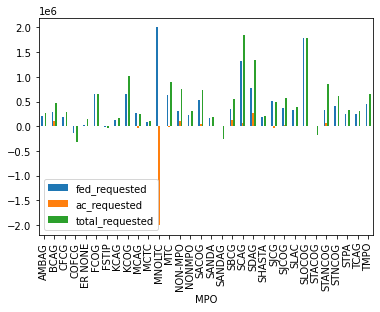

In [69]:
#quick plot to see large picture distribution of funds 
sumstat_mpo.plot.bar()

In [70]:
df.groupby("Agency")[["fed_requested", "ac_requested", "total_requested"]].mean().sort_values('total_requested')

,fed_requested,ac_requested,total_requested
Agency,,,
Alameda Corridor Transportation Authority,-1392639.96,0.00,-15818321.18
Santa Fe Springs,-0.53,0.00,-14714709.09
Rancho Cucamonga,-0.01,0.00,-3123124.48
Pomona,181144.84,0.00,-3112261.01
Grass Valley,56029.29,19262.99,-790810.52
...,...,...,...
Los Angeles County Metropolitan Transportation Authority,11704368.14,0.00,16981834.29
Riverside County Transportation Commission,9303768.53,131649.56,20643806.25
Orange County Transportation Authority,24325731.79,671278.96,29371595.76


In [71]:
##if you want a cleaned csv with just the obligated then export now. In the following cells, we will add the waiting data

#df.to_csv('clean.csv')

## Add Waiting dataset
This dataset includes the in progress obliations and the most recent obligations 


In [72]:
wdf = pd.concat(pd.read_excel('gs://calitp-analytics-data/data-analyses/dla/e-76Obligated/E-76-Waiting-list.xlsx', sheet_name=None), ignore_index=True)



In [73]:
wdf.head()

,Location,PREFIX,Project NO,Agency,prepared date,submit to HQ date,HQ review date,submit to FHWA date,To FMIS date,Fed requested,AC requested,total requested,Status Comment,Locode,DIST,Status,Waiting Days,dist processing Days,HQ processing Days,FHWA processing Days,FTIP No,project location,Type of Work,SEQ,Date Request Initiated,date completed request,MPO,Today,Warning
0,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,43039.00,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,2021-11-01,NaN
1,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,10.00,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaT,NaN
2,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,88.00,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaT,NaN
3,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,49.00,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaT,NaN
4,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,12.00,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaT,NaN


In [74]:
wdf.drop('Today', axis=1, inplace=True)

In [75]:
wdf.rename(columns={'Project NO': 'project_no',
                        'Fed requested': 'fed_requested',
                        'AC requested': 'ac_requested',
                        'total requested': 'total_requested',
                        'FTIP No': 'ftip_no',
                        'project location': 'project_location',
                        'prepared date': 'prepared_date',
                        'submit  to HQ date': 'submit_to_hq_date',
                        'HQ review date': 'hq_review_date',
                        'submit to FHWA date': 'submit_to_fhwa_date',
                        'To FMIS date': 'to_fmis_date',
                        'Status Comment': 'status_comment',
                        'dist processing Days': 'dist_processing_days',
                        'HQ processing Days': 'hq_processing_days',
                        'FHWA processing Days': 'fhwa_processing_days',
                        'Type of Work': 'type_of_work',
                        'Date Request Initiated': 'date_request_initiated',
                        'date completed request': 'date_completed_request'}, inplace=True)

In [76]:
wdf.Agency = wdf.Agency.str.title()

In [77]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                426 non-null    object        
 1   PREFIX                  426 non-null    object        
 2   project_no              426 non-null    object        
 3   Agency                  426 non-null    object        
 4   prepared_date           418 non-null    datetime64[ns]
 5   submit_to_hq_date       261 non-null    datetime64[ns]
 6   hq_review_date          232 non-null    datetime64[ns]
 7   submit_to_fhwa_date     210 non-null    datetime64[ns]
 8   to_fmis_date            210 non-null    datetime64[ns]
 9   fed_requested           426 non-null    float64       
 10  ac_requested            426 non-null    float64       
 11  total_requested         426 non-null    float64       
 12  status_comment          426 non-null    object    

In [78]:
wdf[["ProjectID", "ProjectNO"]] = wdf["project_no"].str.split(pat="(", expand=True)


In [79]:
wdf.ProjectNO = [x.replace(")", "") for x in wdf.ProjectNO]

In [80]:
wdf['Locode'] = wdf['Locode'].apply(get_num)
wdf['ProjectID'] = wdf['ProjectID'].apply(get_num)

In [81]:
compare_col2 = np.where(wdf["Locode"] == wdf["ProjectID"], True, False)
wdf["compare_id_locode"] = compare_col2
wdf.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,Waiting Days,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,Warning,ProjectID,ProjectNO,compare_id_locode
0,DISTRICT,BPMP,5904(141),Humboldt County,2021-08-11,NaT,NaT,NaT,NaT,53348.54,0.00,60260.00,Hold for FTIP amendment.,5904,1,Prepared on 8/11/2021,43039.00,NaN,NaN,NaN,NaN,In Humboldt County On Mccann Road Over The Eel...,Bridge Preventive Maintenance,5,NaT,NaT,NON-MPO,NaN,5904,141,True
1,DISTRICT,ATPL,5904(151),Humboldt County,2021-10-22,NaT,NaT,NaT,NaT,1358000.00,0.00,1358000.00,..,5904,1,Prepared on 10/22/2021,10.00,NaN,NaN,NaN,NaN,On Sr255 From The Dean Avenue/pacific Avenue I...,Class 1 Multi-use Trail (tc),5,NaT,NaT,NON-MPO,NaN,5904,151,True
2,DISTRICT,BPMP,5904(156),Humboldt County,2021-08-05,NaT,NaT,NaT,NaT,629249.10,0.00,710775.00,Hold Obligation authority or apportionment bal...,5904,1,Prepared on 8/5/2021,88.00,NaN,NaN,NaN,NaN,Various Locations In Humboldt County,Bridge Preventive Maintenance: Minor Concrete ...,3,NaT,NaT,NON-MPO,NaN,5904,156,True
3,DISTRICT,BRLO,5904(165),Humboldt County,2021-09-13,NaT,NaT,NaT,NaT,9607.61,0.00,9607.61,..,5904,1,Prepared on 9/13/2021,49.00,NaN,NaN,NaN,NaN,In Humboldt County On Jacoby Creek Bridge At B...,Bridge Rehabilitation Child Project Revegetati...,2,NaT,NaT,NON-MPO,NaN,5904,165,True
4,DISTRICT,HSIPL,5904(181),Humboldt County,2021-10-20,NaT,NaT,NaT,NaT,154662.00,0.00,178643.00,Hold for FTIP amendment.,5904,1,Prepared on 10/20/2021,12.00,NaN,NaN,NaN,NaN,Intersection Of Redwood Drive And Redway Drive...,Install Enhanced Pedestrian Crossing With Bulb...,3,NaT,NaT,NON-MPO,NaN,5904,181,True


In [82]:
wdf['compare_id_locode'].value_counts()

True     361
False     65
Name: compare_id_locode, dtype: int64

In [83]:
wdf['total_requested'] = wdf['total_requested'].astype(float)
cols = ['prepared_date','to_fmis_date','submit_to_fhwa_date','submit_to_hq_date','hq_review_date','date_request_initiated','date_completed_request']
wdf[cols] = wdf[cols].applymap(lambda x : pd.to_datetime(x, format = '%Y-%m-%d'))


In [84]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Location                426 non-null    object        
 1   PREFIX                  426 non-null    object        
 2   project_no              426 non-null    object        
 3   Agency                  426 non-null    object        
 4   prepared_date           418 non-null    datetime64[ns]
 5   submit_to_hq_date       261 non-null    datetime64[ns]
 6   hq_review_date          232 non-null    datetime64[ns]
 7   submit_to_fhwa_date     210 non-null    datetime64[ns]
 8   to_fmis_date            210 non-null    datetime64[ns]
 9   fed_requested           426 non-null    float64       
 10  ac_requested            426 non-null    float64       
 11  total_requested         426 non-null    float64       
 12  status_comment          426 non-null    object    

## Combining the two datasets

In [88]:
combined_df = pd.concat([df, wdf], ignore_index=True)

In [89]:
combined_df.head()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
0,Obligated,BPMP,5904(121),Humboldt County,2018-12-18,2018-12-18,2018-12-18,2018-12-18,2018-12-27,0.00,0.00,0.00,Authorized,5904,1,E-76 approved on,NaN,0.00,9.00,HBPLOCAL,14 Bridges In Humboldt County,Bridge Preventive Maintenance - Deck Joints,3,NaT,NaT,NON-MPO,5904,121,True,NaN,NaN
1,Obligated,ER,32D0(008),Mendocino County,2018-12-17,2018-12-19,2018-12-20,2018-12-20,2018-12-27,11508.00,0.00,13000.00,Authorized,5910,1,E-76 approved on,1.00,1.00,7.00,NaN,"Comptche Ukiah Road, Cr 223 Pm 17.25",Permanent Restoration,3,2018-12-17,2018-12-18,NON-MPO,32D0,008,False,NaN,NaN
2,Obligated,ER,4820(004),Humboldt County,2018-12-07,2018-12-21,2018-12-21,2018-12-21,2018-12-27,45499.64,0.00,51394.58,Authorized,5904,1,E-76 approved on,14.00,0.00,6.00,NaN,Mattole Rd Pm 43.17,Permanent Restoration,5,2018-12-06,2018-12-07,NON-MPO,4820,004,False,NaN,NaN
3,Obligated,CML,5924(244),Sacramento County,2018-12-11,2018-12-11,2018-12-21,2018-12-27,2018-12-27,207002.00,0.00,247002.00,Authorized,5924,3,E-76 approved on,4.00,16.00,0.00,SAC25086,Fair Oaks Blvd. Between Howe Ave And Munroe St,Create A Smart Growth Corridor With Barrier Se...,1,2018-12-07,2018-12-07,SACOG,5924,244,True,NaN,NaN
4,Obligated,CML,5924(214),Sacramento County,2018-12-05,2018-12-11,2018-12-21,2018-12-27,2018-12-27,0.00,5680921.00,5702041.00,Authorized,5924,3,E-76 approved on,7.00,16.00,0.00,SAC24753,Florin Rd Between Power Inn Rd. And Florin Per...,Streetscape (tc),3,2018-11-28,2018-12-04,SACOG,5924,214,True,NaN,NaN


In [90]:
combined_df.tail()

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
20440,DISTRICT,FTASTPL,6343(006),Mctd,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6343,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Bus Stops Improvement,1,NaT,NaT,MTC,6343,006,True,NaN,NaN
20441,DISTRICT,FTASTPL,6264(091),Vta,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6264,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Electronic Locker Upgrade And Replacement,1,NaT,NaT,MTC,6264,091,True,NaN,NaN
20442,DISTRICT,FTASTPL,6002(030),Ala-Con Costa T,NaT,NaT,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6002,4,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Quick Builds And Tempo Lane Delineation,1,NaT,NaT,MTC,6002,030,True,NaN,NaN
20443,HQ,CASB003,6190(033),Usda Forest Ser,2017-12-14,2017-12-14,NaT,NaT,NaT,0.00,0.00,0.00,prog code,6190,7,FTA transferred waiting at HQ,NaN,NaN,NaN,NaN,FTA transfer,Fhwa Transfer: Corridor Management Planning,1,NaT,NaT,NON-MPO,6190,033,True,NaN,NaN
20444,DISTRICT,HSIPL,7504(001),Caltrans,NaT,NaT,NaT,NaT,NaT,351200.00,0.00,351200.00,prog code Z300,7504,11,FTA transferred waiting at DISTRICT,NaN,0.00,0.00,NaN,FTA transfer,Guardrail Var. Locations,1,NaT,NaT,NaN,7504,001,True,NaN,NaN


In [91]:
combined_df.sample(10)

,Location,PREFIX,project_no,Agency,prepared_date,submit_to_hq_date,hq_review_date,submit_to_fhwa_date,to_fmis_date,fed_requested,ac_requested,total_requested,status_comment,Locode,DIST,Status,dist_processing_days,hq_processing_days,fhwa_processing_days,ftip_no,project_location,type_of_work,SEQ,date_request_initiated,date_completed_request,MPO,ProjectID,ProjectNO,compare_id_locode,Waiting Days,Warning
17270,Obligated,SRTSL,5457(019),Yucaipa,2019-06-26,2020-07-31,2020-08-27,2020-08-28,2020-09-10,508600.00,0.00,1333508.00,Authorized,5457,8,E-76 approved on,423.00,28.00,13.00,SCAG016,"12th Street From Avenue ""e"" To Kentucky Street...","Construct Sidewalks, Curb Ramps, Section Of Mu...",1,2019-06-04,2020-07-23,SCAG,5457,019,True,NaN,NaN
8036,Obligated,ER,4400(055),Humboldt County,2015-10-19,2015-10-19,2015-11-10,2015-11-10,2015-11-13,-6275.35,0.00,-1787.64,Authorized,5904,1,E-76 approved on E-76 approved on,0.00,22.00,3.00,NaN,Alderpoint Road Pm 44.78,Storm Damage Repair,7,NaT,NaT,NON-MPO,4400,055,False,NaN,NaN
19515,Obligated,HSIPL,5012(152),Oakland,2021-06-17,2021-07-08,2021-07-13,2021-07-14,2021-07-15,0.00,0.00,-396996.00,Authorized,5012,4,E-76 approved on,22.00,6.00,1.00,VAR170002,High Street From San Leandro Street To Porter ...,"Construct Crossing Enhancements, Signal Placem...",3,2021-06-16,2021-06-17,MTC,5012,152,True,NaN,NaN
18492,Obligated,BRLO,5910(084),Mendocino County,2020-08-19,2021-02-03,2021-02-26,2021-03-01,2021-03-04,117000.00,0.00,117000.00,Authorized,5910,1,E-76 approved on,264.00,26.00,3.00,HBPLOCAL,Hill Road Bridge Over Mill Creek,Replace Bridge (tc),4,2020-05-15,2020-07-15,NON-MPO,5910,084,True,NaN,NaN
11324,Obligated,CASB12,5391(013),Morro Bay,2014-04-23,2014-07-10,2014-07-16,2014-07-16,2014-07-20,980000.00,0.00,1436670.00,Authorized,5391,5,E-76 approved on E-76 approved on,78.00,6.00,4.00,22300000449,"In The City Of Morro Bay, From Route 41 To Mor...",Construct Pedestrian And Bicycle Path And Bridge,2,NaT,NaT,SLAC,5391,013,True,NaN,NaN
19381,Obligated,HSIPL,5252(018),Parlier,2021-06-04,2021-06-04,2021-06-04,2021-06-04,2021-06-10,0.00,0.00,0.00,Authorized,5252,6,E-76 approved on,8.00,0.00,6.00,FRE040401,Zediker Ave. From 500' S Of Manning Ave. To 75...,"Widen Roadway; Install Left-turn, Two-way Left...",5,2021-05-27,2021-05-28,CFCG,5252,018,True,NaN,NaN
18744,Obligated,HPLUL,5004(187),San Diego,2021-03-09,2021-03-16,2021-03-17,2021-03-17,2021-03-25,0.00,0.00,524205.19,Authorized,5004,11,E-76 approved on,43.00,1.00,8.00,SD102A,Britannia Blvd. To Drucker Ln Along Secondary ...,Extend Otay Mesa Truck Route W/ Capacity Increase,4,2021-02-01,2021-03-16,SDAG,5004,187,True,NaN,NaN
15248,Obligated,HSIPL,5362(023),Commerce,2019-08-01,2019-10-10,2019-10-17,2019-10-31,2019-11-08,935280.00,0.00,1039200.00,Authorized,5362,7,E-76 approved on,80.00,21.00,8.00,SCAG015,City Wide - 39 Locations In City Of Commerce,Upgrade Traffic Interconnected System At 39 In...,1,2019-07-22,2019-07-30,SCAG,5362,023,True,NaN,NaN
19592,Obligated,HIPL,5926(066),Amador County,2021-04-27,2021-04-30,2021-07-20,2021-07-20,2021-07-28,98811.00,0.00,2849811.00,Authorized,5926,10,E-76 approved on,14.00,81.00,8.00,NaN,Pine Grove Improvements At Sr 88 - Climax Road...,Construct Safety And Operational Improvements,1,2021-04-16,2021-04-29,NON-MPO,5926,066,True,NaN,NaN
8100,Obligated,ER,28C3(003),Monterey County,2015-10-07,2015-10-21,2015-10-30,2015-10-30,2015-11-03,15800.00,0.00,15800.00,Authorized,5944,5,E-76 approved on E-76 approved on,14.00,9.00,4.00,NaN,In The County Of Monterey On River Road Pm 14....,"County Forces Provided Traffic Control, Remova...",1,NaT,NaT,AMBAG,28C3,003,False,NaN,NaN


In [92]:
group2 = combined_df.groupby('Agency')
crosswalk_waiting_and_obligated = group2.apply(lambda x: x['Locode'].unique())
print(crosswalk_waiting_and_obligated)

Agency
Access Services                                             [6312]
Agoura Hills                                           [5435, nan]
Ala-Con Costa T                                             [6002]
Alameda                                                     [5014]
Alameda - Contra Costa Transit District                     [6002]
                                                    ...           
Yrts                                                         [nan]
Yuba City                                                   [5163]
Yuba County                                                 [5916]
Yucaipa                                    [5457, nan, 5954, NBIL]
Yucca Valley                                           [5466, nan]
Length: 671, dtype: object


In [97]:
## Convert to csv to use for additonal datasets

#crosswalk_waiting_and_obligated.to_csv('crosswalk_waiting_and_obligated.csv')

In [98]:
prefix_waiting_obligated = combined_df['PREFIX'].value_counts()
print(prefix_waiting_obligated)

CML        3334
HSIPL      3331
STPL       2810
ER         1607
BRLO       1416
           ... 
CASB09        1
DEMO11        1
TCIFESP       1
RPSTPL-       1
FTACRRS       1
Name: PREFIX, Length: 392, dtype: int64


In [100]:
##Getting a CSV to create a detailed crosswalk with defintions. 

#prefix_waiting_obligated.to_csv('count_grant_types_waiting_obligated.csv')

## Convert to CSV for future analysis 

In [102]:
##if you want a cleaned csv with just the obligated then export now. In the following cells, we will add the waiting data

#combined_df.to_csv('clean_waiting_obligated.csv')